# モデルの解釈

機械学習の解釈可能性とモデルの比較

[Document (Model Explainability)](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html)

In [1]:
from ordered_set import OrderedSet
import numpy as np

import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML

h2o.__version__

'3.36.0.4'

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.9" 2020-10-20 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.9+7-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.9+7-LTS, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpeyquueij
  JVM stdout: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpeyquueij/h2o_YShimada_MBP16_started_from_python.out
  JVM stderr: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpeyquueij/h2o_YShimada_MBP16_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,3 months and 21 days !!!
H2O_cluster_name:,H2O_from_python_YShimada_MBP16_tyebv3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


***

## 機械学習の解釈可能性

- Confusion Matrix (分類)
- Residual Analysis (回帰)
- Variable Importance
- Permutation Variable Importance
- SHAP
- Partial Dependence (PD) Plots
- Individual Conditional Expectation (ICE) Plots

### 分類問題

In [3]:
frame_CreditCard = h2o.import_file('https://h2oai-jpn-public.s3.amazonaws.com/sample-data/uci-credit-card/UCI_Credit_Card3.csv',
                                  col_types={'default_payment_next_month':'enum'})
frame_CreditCard.shape

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


(30000, 25)

In [4]:
frame_CreditCard.describe()

Rows:30000
Cols:25




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
type,int,int,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,1.0,10000.0,,,,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,15000.5,167484.32266666667,,,,35.4855,-0.01669999999999999,-0.13376666666666667,-0.1662,-0.2206666666666667,-0.2662,-0.2911,51223.3309,49179.07516666667,47013.1548,43262.94896666666,40311.40096666667,38871.7604,5663.5805,5921.163499999999,5225.6815,4826.076866666666,4799.387633333334,5215.502566666667,
maxs,30000.0,1000000.0,,,,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,
sigma,8660.398374208891,129747.6615672024,,,,9.217904068090185,1.1238015279973348,1.1971859730345533,1.1968675684465737,1.1691386224023375,1.1331874060027483,1.1499876256079027,73635.86057552956,71173.76878252834,69349.38742703684,64332.85613391631,60797.15577026487,59554.10753674573,16563.280354025766,23040.870402057233,17606.961469803104,15666.159744032007,15278.305679144789,17777.465775435296,
zeros,0,0,,,,0,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,
missing,0,0,0,345,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,20000.0,M,university,married,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,M,university,single,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,M,university,single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [5]:
y_col_creditc = 'default_payment_next_month'
print('ターゲット変数： {}'.format(y_col_creditc))
X_cols_creditc = list( OrderedSet(frame_CreditCard.names) - OrderedSet(['ID',y_col_creditc]) )    # IDとターゲット変数を除外
print('特徴量： {}'.format(X_cols_creditc))

ターゲット変数： default_payment_next_month
特徴量： ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [6]:
# モデル(GMB)の学習
gbm_c= H2OGradientBoostingEstimator(seed=12345, model_id='default_gbm_classification', nfolds=3)
gbm_c.train(x=X_cols_creditc, y=y_col_creditc, training_frame=frame_CreditCard)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  default_gbm_classification


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,20265.0,5.0,5.0,5.0,15.0,32.0,27.58




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12662236916578856
RMSE: 0.35584037034292293
LogLoss: 0.4072442075266401
Mean Per-Class Error: 0.2712940233858492
AUC: 0.8094376111365491
AUCPR: 0.6163425058469529
Gini: 0.6188752222730982

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2521713444777117: 


,,0,1,Error,Rate
0,0,19834.0,3530.0,0.1511,(3530.0/23364.0)
1,1,2598.0,4038.0,0.3915,(2598.0/6636.0)
2,Total,22432.0,7568.0,0.2043,(6128.0/30000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.252171,0.568572,225.0
1,max f2,0.131700,0.660096,313.0
2,max f0point5,0.513847,0.617000,124.0
3,max accuracy,0.513847,0.831900,124.0
4,max precision,0.931704,1.000000,0.0
5,max recall,0.040657,1.000000,396.0
6,max specificity,0.931704,1.000000,0.0
7,max absolute_mcc,0.320336,0.452946,193.0
8,max min_per_class_accuracy,0.185089,0.724081,268.0
9,max mean_per_class_accuracy,0.221902,0.731903,242.0



Gains/Lift Table: Avg response rate: 22.12 %, avg score: 22.13 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010000,0.796710,4.370102,4.370102,0.966667,0.830671,0.966667,0.830671,0.043701,0.043701,337.010247,337.010247,0.043273
1,2,0.020000,0.774074,3.857746,4.113924,0.853333,0.784943,0.910000,0.807807,0.038577,0.082278,285.774563,311.392405,0.079967
2,3,0.030000,0.750771,3.827607,4.018485,0.846667,0.761602,0.888889,0.792405,0.038276,0.120555,282.760699,301.848503,0.116274
3,4,0.040000,0.726964,3.556359,3.902954,0.786667,0.738837,0.863333,0.779013,0.035564,0.156118,255.635925,290.295359,0.149099
4,5,0.050000,0.704081,3.481013,3.818565,0.770000,0.715616,0.844667,0.766334,0.034810,0.190928,248.101266,281.856540,0.180956
5,6,0.100000,0.578895,3.019892,3.419228,0.668000,0.650580,0.756333,0.708457,0.150995,0.341923,201.989150,241.922845,0.310635
6,7,0.150000,0.401604,2.136829,2.991762,0.472667,0.484183,0.661778,0.633699,0.106841,0.448764,113.682942,199.176211,0.383621
7,8,0.200000,0.307653,1.793249,2.692134,0.396667,0.347466,0.595500,0.562141,0.089662,0.538427,79.324895,169.213382,0.434549
8,9,0.300333,0.219891,1.227073,2.202696,0.271429,0.257702,0.487236,0.460436,0.123116,0.661543,22.707311,120.269622,0.463803
9,10,0.400000,0.174655,0.833096,1.861438,0.184281,0.195451,0.411750,0.394410,0.083032,0.744575,-16.690354,86.143761,0.442444




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.13387565635919912
RMSE: 0.3658902244652064
LogLoss: 0.4271468151513585
Mean Per-Class Error: 0.2879679112515414
AUC: 0.7827620498050664
AUCPR: 0.5591211943110213
Gini: 0.5655240996101327

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2619680895667966: 


,,0,1,Error,Rate
0,0,19840.0,3524.0,0.1508,(3524.0/23364.0)
1,1,2821.0,3815.0,0.4251,(2821.0/6636.0)
2,Total,22661.0,7339.0,0.2115,(6345.0/30000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.261968,0.545975,221.0
1,max f2,0.121578,0.638952,323.0
2,max f0point5,0.462858,0.580767,139.0
3,max accuracy,0.542689,0.821033,113.0
4,max precision,0.910509,1.000000,0.0
5,max recall,0.033630,1.000000,398.0
6,max specificity,0.910509,1.000000,0.0
7,max absolute_mcc,0.360787,0.419744,177.0
8,max min_per_class_accuracy,0.180747,0.705847,273.0
9,max mean_per_class_accuracy,0.225004,0.713800,242.0



Gains/Lift Table: Avg response rate: 22.12 %, avg score: 22.12 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.803070,3.812538,3.812538,0.843333,0.832091,0.843333,0.832091,0.038125,0.038125,281.253767,281.253767,0.036114
1,2,0.02,0.772955,3.496082,3.654310,0.773333,0.786855,0.808333,0.809473,0.034961,0.073086,249.608198,265.430983,0.068164
2,3,0.03,0.749526,3.435805,3.581475,0.760000,0.761092,0.792222,0.793346,0.034358,0.107444,243.580470,258.147478,0.099440
3,4,0.04,0.725950,3.375527,3.529988,0.746667,0.738216,0.780833,0.779563,0.033755,0.141200,237.552743,252.998794,0.129943
4,5,0.05,0.702435,3.074141,3.438819,0.680000,0.714643,0.760667,0.766579,0.030741,0.171941,207.414105,243.881857,0.156575
5,6,0.10,0.581769,2.947559,3.193189,0.652000,0.648012,0.706333,0.707295,0.147378,0.319319,194.755877,219.318867,0.281611
6,7,0.15,0.405381,2.200121,2.862166,0.486667,0.485043,0.633111,0.633211,0.110006,0.429325,120.012055,186.216596,0.358661
7,8,0.20,0.311017,1.663653,2.562538,0.368000,0.352922,0.566833,0.563139,0.083183,0.512508,66.365280,156.253767,0.401268
8,9,0.30,0.219967,1.194997,2.106691,0.264333,0.258874,0.466000,0.461717,0.119500,0.632007,19.499699,110.669078,0.426306
9,10,0.40,0.173924,0.849910,1.792495,0.188000,0.195263,0.396500,0.395104,0.084991,0.716998,-15.009042,79.249548,0.407034




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.790695,0.005057,0.796246,0.789489,0.786350
1,auc,0.783420,0.005759,0.789656,0.778304,0.782299
2,err,0.209305,0.005057,0.203754,0.210510,0.213650
3,err_count,2093.000000,47.791214,2041.000000,2103.000000,2135.000000
4,f0point5,0.533350,0.004992,0.527636,0.535549,0.536866
5,f1,0.547026,0.002260,0.544521,0.547645,0.548912
6,f2,0.561445,0.001113,0.562523,0.560299,0.561511
7,lift_top_group,3.909360,0.181212,4.114891,3.840590,3.772599
8,logloss,0.427159,0.012566,0.412716,0.433174,0.435587
9,max_per_class_error,0.428499,0.003257,0.424800,0.430934,0.429763



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-07-22 11:38:10,8.199 sec,0.0,0.415055,0.528423,0.500000,0.221200,1.000000,0.778800
1,,2022-07-22 11:38:10,8.418 sec,1.0,0.405936,0.507790,0.764235,0.549255,3.576035,0.196200
2,,2022-07-22 11:38:10,8.497 sec,2.0,0.398594,0.492646,0.767284,0.552556,3.576035,0.207300
3,,2022-07-22 11:38:10,8.559 sec,3.0,0.392621,0.480990,0.767747,0.556623,3.641206,0.201333
4,,2022-07-22 11:38:10,8.620 sec,4.0,0.387701,0.471677,0.774838,0.560356,3.639290,0.201433
5,,2022-07-22 11:38:10,8.682 sec,5.0,0.383611,0.464092,0.774987,0.569377,3.812130,0.200100
6,,2022-07-22 11:38:10,8.748 sec,6.0,0.380184,0.457771,0.776375,0.573006,3.919169,0.200500
7,,2022-07-22 11:38:10,8.813 sec,7.0,0.377361,0.452618,0.777641,0.574157,3.901509,0.205667
8,,2022-07-22 11:38:10,8.884 sec,8.0,0.375067,0.448384,0.779447,0.575325,4.090950,0.198200
9,,2022-07-22 11:38:10,8.953 sec,9.0,0.373042,0.444539,0.781753,0.577987,4.048844,0.201600



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PAY_1,4142.296875,1.000000,0.585548
1,PAY_2,707.896545,0.170895,0.100067
2,LIMIT_BAL,318.890717,0.076984,0.045078
3,BILL_AMT1,279.555328,0.067488,0.039517
4,PAY_3,242.840897,0.058625,0.034328
5,PAY_4,152.749512,0.036876,0.021592
6,PAY_5,142.158127,0.034319,0.020095
7,PAY_6,129.416519,0.031243,0.018294
8,AGE,114.329399,0.027600,0.016161
9,PAY_AMT1,98.399841,0.023755,0.013910



See the whole table with table.as_data_frame()


#### Globalな解釈

[explainメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.explain)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## default_gbm_classification


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.252171346572449: 


,,0,1,Error,Rate
0,0,19834.0,3530.0,0.1511,(3530.0/23364.0)
1,1,2598.0,4038.0,0.3915,(2598.0/6636.0)
2,Total,22432.0,7568.0,0.2043,(6128.0/30000.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

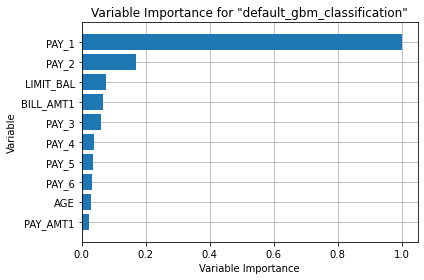

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

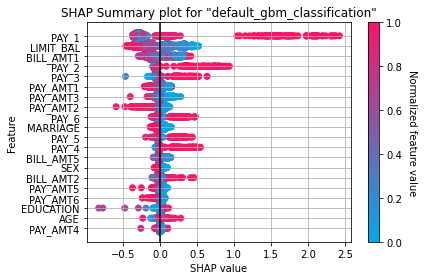

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

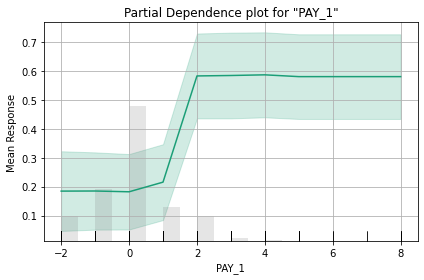

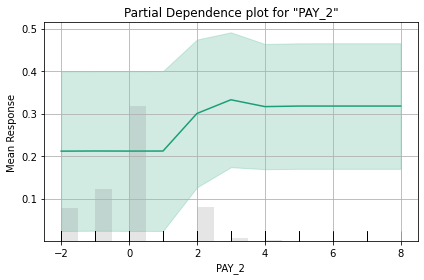

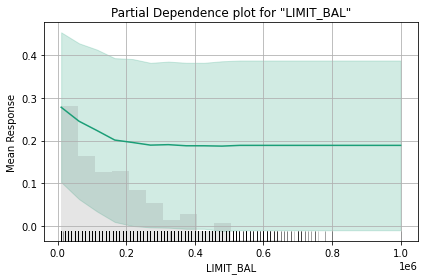

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## default_gbm_classification


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.252171346572449: 


,,0,1,Error,Rate
0,0,19834.0,3530.0,0.1511,(3530.0/23364.0)
1,1,2598.0,4038.0,0.3915,(2598.0/6636.0)
2,Total,22432.0,7568.0,0.2043,(6128.0/30000.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [7]:
gbm_c.explain(frame_CreditCard, figsize=[6,4], top_n_features=3)

> 個別に表示させる場合

##### Feature Importance
[Feature Importanceに関して](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/variable-importance.html)（算出方法はアルゴリズムに依存（Model Specific））

[varimpメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.varimp)

In [9]:
gbm_c.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,PAY_1,4142.296875,1.000000,0.585548
1,PAY_2,707.896545,0.170895,0.100067
2,LIMIT_BAL,318.890717,0.076984,0.045078
3,BILL_AMT1,279.555328,0.067488,0.039517
4,PAY_3,242.840897,0.058625,0.034328
5,PAY_4,152.749512,0.036876,0.021592
6,PAY_5,142.158127,0.034319,0.020095
7,PAY_6,129.416519,0.031243,0.018294
8,AGE,114.329399,0.027600,0.016161
9,PAY_AMT1,98.399841,0.023755,0.013910


[varimp_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.varimp_plot)

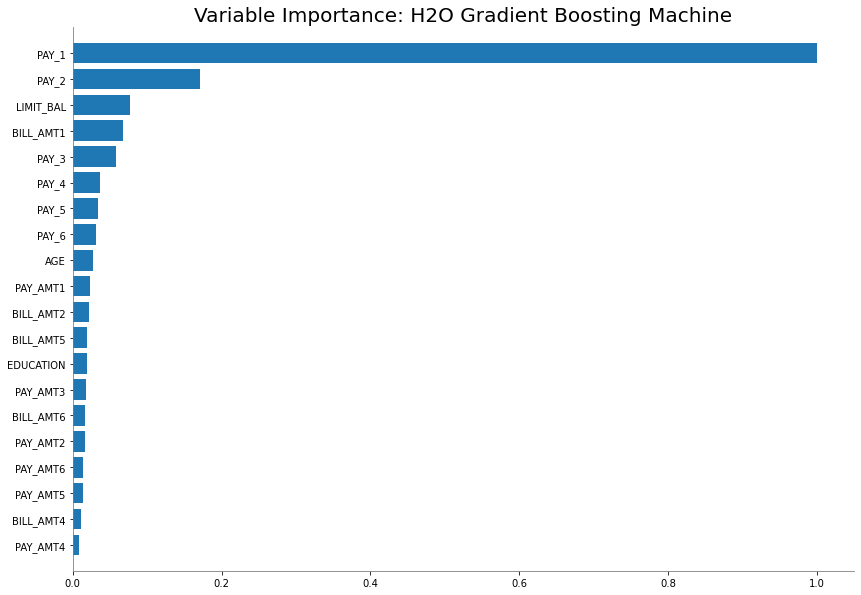

<Figure size 432x288 with 0 Axes>

In [10]:
gbm_c.varimp_plot(num_of_features=20)

##### Permutation Feature Importance
[Permutation Feature Importanceに関して](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/permutation-variable-importance.html)（Model Agnosticなアプローチ）

[permutation_importance_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.permutation_importance_plot)

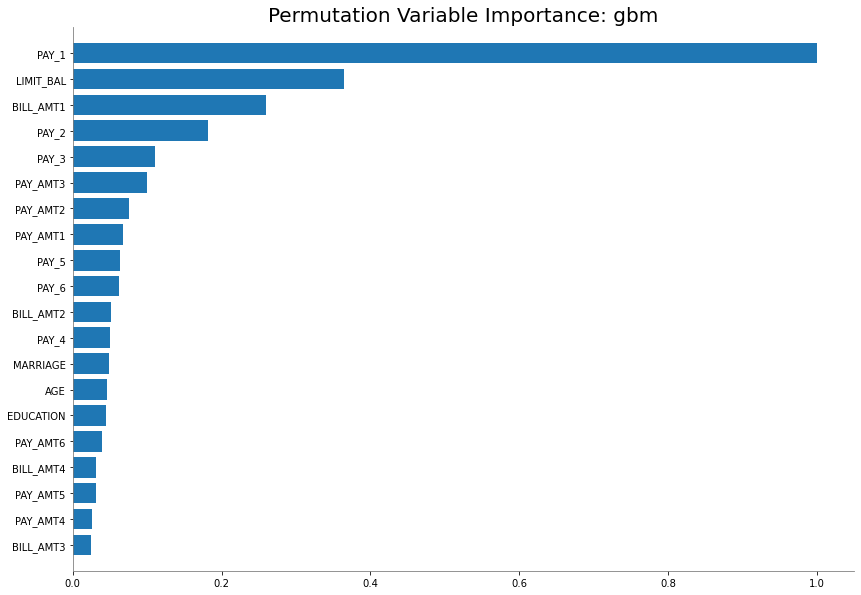


Variable Importances: 


,Variable,Relative Importance,Scaled Importance,Percentage
0,PAY_1,0.071838,1.000000,0.365897
1,LIMIT_BAL,0.026178,0.364405,0.133335
2,BILL_AMT1,0.018707,0.260407,0.095282
3,PAY_2,0.013105,0.182428,0.066750
4,PAY_3,0.007934,0.110439,0.040409
5,PAY_AMT3,0.007216,0.100451,0.036755
6,PAY_AMT2,0.005465,0.076070,0.027834
7,PAY_AMT1,0.004893,0.068116,0.024923
8,PAY_5,0.004560,0.063476,0.023226
9,PAY_6,0.004485,0.062432,0.022844



See the whole table with table.as_data_frame()


In [11]:
gbm_c.permutation_importance_plot(frame_CreditCard, num_of_features=20, seed=12345)

[permutation_importanceメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.permutation_importance)  
テーブルのみ取得する場合

In [12]:
gbm_c.permutation_importance(frame_CreditCard, seed=12345)


Variable Importances: 


,Variable,Relative Importance,Scaled Importance,Percentage
0,PAY_1,0.071838,1.000000,0.365897
1,LIMIT_BAL,0.026178,0.364405,0.133335
2,BILL_AMT1,0.018707,0.260407,0.095282
3,PAY_2,0.013105,0.182428,0.066750
4,PAY_3,0.007934,0.110439,0.040409
5,PAY_AMT3,0.007216,0.100451,0.036755
6,PAY_AMT2,0.005465,0.076070,0.027834
7,PAY_AMT1,0.004893,0.068116,0.024923
8,PAY_5,0.004560,0.063476,0.023226
9,PAY_6,0.004485,0.062432,0.022844



See the whole table with table.as_data_frame()


##### Shapley

[shap_summary_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.shap_summary_plot)

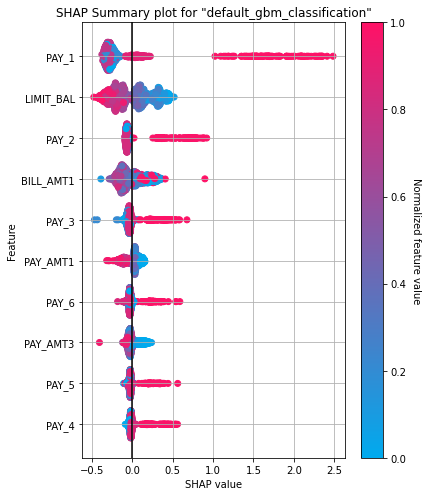

In [13]:
gbm_c.shap_summary_plot(frame_CreditCard, figsize=[6,7], top_n_features=10)

[predict_contributionsメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.predict_contributions)  
実際のShapley値を取得する場合

In [14]:
gbm_c.predict_contributions(frame_CreditCard)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BiasTerm
0.191833,-0.0190706,0.0210543,0.102442,-0.0317465,1.51385,0.346387,-0.115521,-0.0258978,-0.0598003,-0.0539594,0.161272,-0.00961654,0.0476057,-0.00802279,0.0372989,-0.0137648,0.0761711,0.0406582,0.117168,0.0529624,0.0212891,0.0312308,-1.50814
0.0341246,-0.0416313,0.0140381,-0.040268,-0.0102748,-0.23331,0.784757,-0.0266981,0.011015,-0.0669298,0.274759,0.0687895,-0.0053627,-0.00340896,-0.00865979,0.0105061,-0.0212475,0.104409,0.0810471,-0.0427592,0.0156953,0.0304307,0.0150839,-1.50814
0.109914,-0.0214091,0.016602,-0.0363888,-0.00530141,-0.300829,-0.0768336,-0.0207722,-0.0175102,-0.0312404,-0.0315912,-0.161488,-0.036879,-0.00767288,-0.00262797,-0.0189632,-0.0083718,0.0384143,0.0669399,-0.0167386,0.00453495,-0.00025292,-0.0298697,-1.50814
0.33245,-0.035561,0.0261714,0.061872,-0.00288935,-0.287635,-0.0696276,-0.0290867,-0.0246562,-0.0267717,-0.0288643,-0.121018,-0.00765433,-0.0065473,-0.00638892,-0.0277121,-0.00625186,0.0400894,0.00938421,-0.0250249,0.0107795,-0.000208532,0.0093039,-1.50814
0.245683,0.0470954,0.0110427,0.0997614,0.0260237,-0.281032,-0.0630989,-0.0860808,-0.0155411,-0.0175085,-0.0366881,-0.0192165,-0.0548334,-0.0166668,-0.00155842,-0.0644039,-0.00977828,0.0408772,-0.379957,-0.0819583,-0.0197658,0.00626919,0.0229023,-1.50814
0.295567,0.0332218,-0.0449449,-0.0805366,0.011757,-0.293515,-0.0641576,-0.0270223,-0.0185369,-0.0271919,-0.023496,-0.143071,-0.0240759,-0.00775616,-0.0030623,-0.0410958,-0.00852906,0.0361699,-0.0197553,0.015788,0.0108396,0.00336441,0.027369,-1.50814
-0.381966,-0.0601304,-0.05522,-0.0473828,0.0178259,-0.317086,-0.067253,-0.0375797,-0.0109802,-0.0286934,-0.0140803,0.233461,0.285277,0.169931,0.118575,0.042921,-0.030578,-0.183275,-0.329688,-0.035432,-0.0158477,-0.116145,-0.0373127,-1.50814
0.018429,-0.0257249,0.00631587,-0.0384094,-0.0165855,-0.272048,-0.0688368,-0.0569794,-0.0058095,-0.02486,-0.01595,-0.115056,-0.00187249,0.00910844,-0.0380026,0.0680329,-0.00642702,0.0723043,0.0652754,0.131683,0.0113306,-0.0299032,0.015062,-1.50814
-0.0273056,-0.0385372,-0.0142367,0.041215,0.00317676,-0.268941,-0.079712,0.435239,-0.0152415,-0.0172663,-0.0241606,-0.0857136,-0.0382791,-0.00104277,-0.0280868,-0.0220738,0.000424438,0.0128647,0.0620346,0.0426682,-0.000769707,-0.0120513,0.0207895,-1.50814
0.186584,0.0294778,0.0106141,-0.0708469,-0.0269601,-0.235874,-0.0690658,-0.0814892,-0.0456013,-0.0285164,-0.0263841,0.0487339,-0.0649667,0.00351368,-0.00900189,-0.0741491,-0.0269816,0.129161,0.024564,0.111922,-0.100394,0.00711265,0.0430147,-1.50814


Shap値の合計が予測値に一致

In [15]:
sum_shapley = gbm_c.predict_contributions(frame_CreditCard[0,:]).sum()
print('オブザベーション0のShap値の合計: {}'.format(sum_shapley))
print('オブザベーション0のShap値の合計のLogit変換: {}'.format(1 / (1+np.exp(-1*sum_shapley))))

contributions progress: |████████████████████████████████████████████████████████| (done) 100%
オブザベーション0のShap値の合計: 0.9156840061768889
オブザベーション0のShap値の合計のLogit変換: 0.7141618766181793


In [16]:
# オブザベーション0の予測結果
gbm_c.predict(frame_CreditCard[0,:])

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.285838,0.714162


##### Partial Dependence Plot

[pd_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.pd_plot)

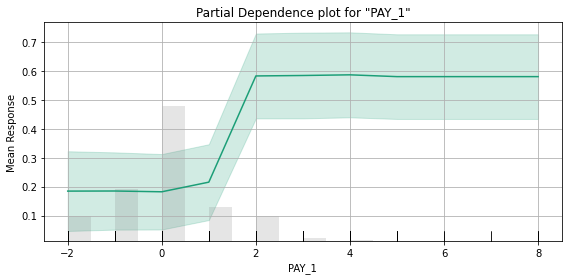

In [17]:
gbm_c.pd_plot(frame_CreditCard, column='PAY_1', figsize=[8,4])

[partial_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.partial_plot)

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model default_gbm_classification on column 'PAY_1'.


,pay_1,mean_response,stddev_response,std_error_mean_response
0,-2.0,0.184587,0.137824,0.000796
1,-1.0,0.184937,0.133602,0.000771
2,0.0,0.182233,0.130439,0.000753
3,1.0,0.215557,0.131080,0.000757
4,2.0,0.582820,0.146701,0.000847
5,3.0,0.584370,0.148228,0.000856
6,4.0,0.586674,0.146953,0.000848
7,5.0,0.580457,0.146380,0.000845
8,6.0,0.580457,0.146380,0.000845
9,7.0,0.580457,0.146380,0.000845



PartialDependence: Partial Dependence Plot of model default_gbm_classification on column 'PAY_2'.


,pay_2,mean_response,stddev_response,std_error_mean_response
0,-2.0,0.211502,0.187895,0.001085
1,-1.0,0.211845,0.187735,0.001084
2,0.0,0.211630,0.187977,0.001085
3,1.0,0.211752,0.188124,0.001086
4,2.0,0.300191,0.173940,0.001004
5,3.0,0.332446,0.158725,0.000916
6,4.0,0.316354,0.147386,0.000851
7,5.0,0.317597,0.147729,0.000853
8,6.0,0.317643,0.147819,0.000853
9,7.0,0.317643,0.147819,0.000853


[, ]

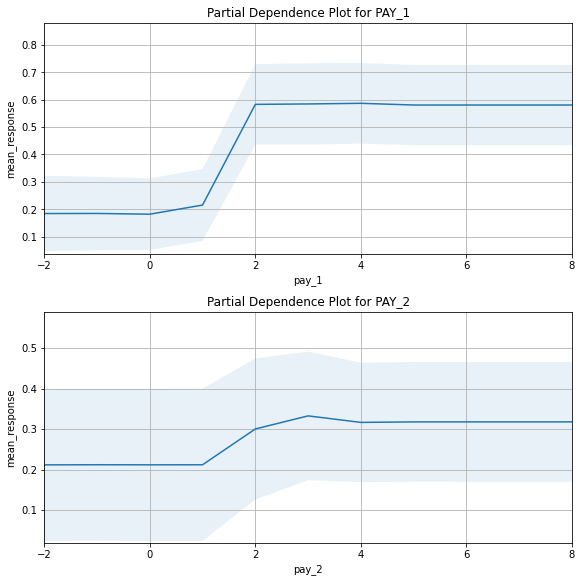

In [18]:
gbm_c.partial_plot(frame_CreditCard, cols=['PAY_1', 'PAY_2'], figsize=(8,8))

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

2D-PartialDependence: 2D Partial Dependence Plot of model default_gbm_classification on 1st column 'PAY_1' and 2nd column 'LIMIT_BAL'


,pay_1,limit_bal,mean_response,stddev_response,std_error_mean_response
0,-2.0,1.000000e+04,0.250530,0.135791,0.000784
1,-2.0,6.210526e+04,0.209073,0.128781,0.000744
2,-2.0,1.142105e+05,0.185103,0.130130,0.000751
3,-2.0,1.663158e+05,0.160709,0.126464,0.000730
4,-2.0,2.184211e+05,0.151140,0.119650,0.000691
5,-2.0,2.705263e+05,0.143076,0.112683,0.000651
6,-2.0,3.226316e+05,0.144926,0.116267,0.000671
7,-2.0,3.747368e+05,0.142311,0.116324,0.000672
8,-2.0,4.268421e+05,0.142262,0.116294,0.000671
9,-2.0,4.789474e+05,0.138855,0.114917,0.000663



See the whole table with table.as_data_frame()

2D-PartialDependence: 2D Partial Dependence Plot of model default_gbm_classification on 1st column 'PAY_2' and 2nd column 'BILL_AMT1'


,pay_2,bill_amt1,mean_response,stddev_response,std_error_mean_response
0,-2.0,-165580.000000,0.203901,0.155940,0.000900
1,-2.0,-106101.526316,0.203901,0.155940,0.000900
2,-2.0,-46623.052632,0.203901,0.155940,0.000900
3,-2.0,12855.421053,0.198618,0.196660,0.001135
4,-2.0,72333.894737,0.186702,0.187848,0.001085
5,-2.0,131812.368421,0.195923,0.184906,0.001068
6,-2.0,191290.842105,0.203782,0.182608,0.001054
7,-2.0,250769.315789,0.212801,0.180984,0.001045
8,-2.0,310247.789474,0.212495,0.181184,0.001046
9,-2.0,369726.263158,0.235418,0.185180,0.001069



See the whole table with table.as_data_frame()


[, ]

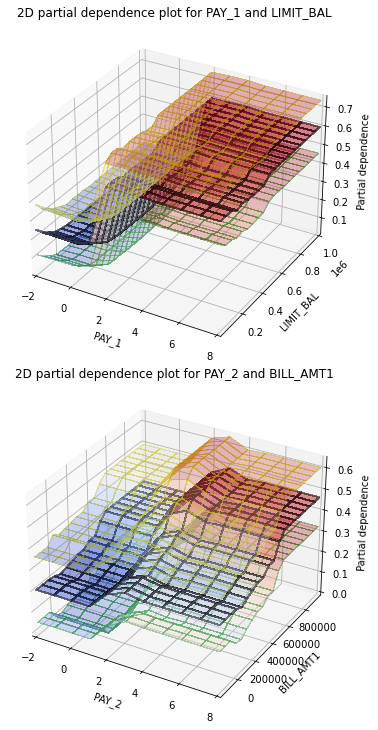

In [19]:
gbm_c.partial_plot(frame_CreditCard, col_pairs_2dpdp=[['PAY_1', 'LIMIT_BAL'], ['PAY_2', 'BILL_AMT1']])

##### ICE Plot

[ice_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.ice_plot)

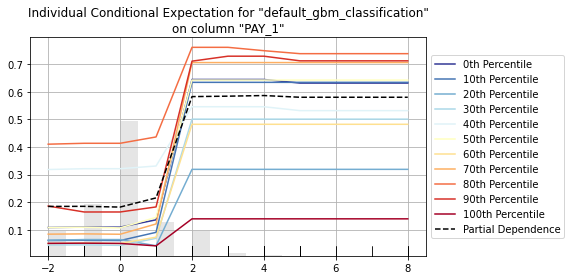

In [20]:
gbm_c.ice_plot(frame_CreditCard, column='PAY_1', figsize=(8, 4), colormap='RdYlBu_r')

※ 現バージョンでは、個別のICEプロットの作成は不可。Percentileのみのサポート

#### Localな解釈

[shap_explain_row_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.shap_explain_row_plot)

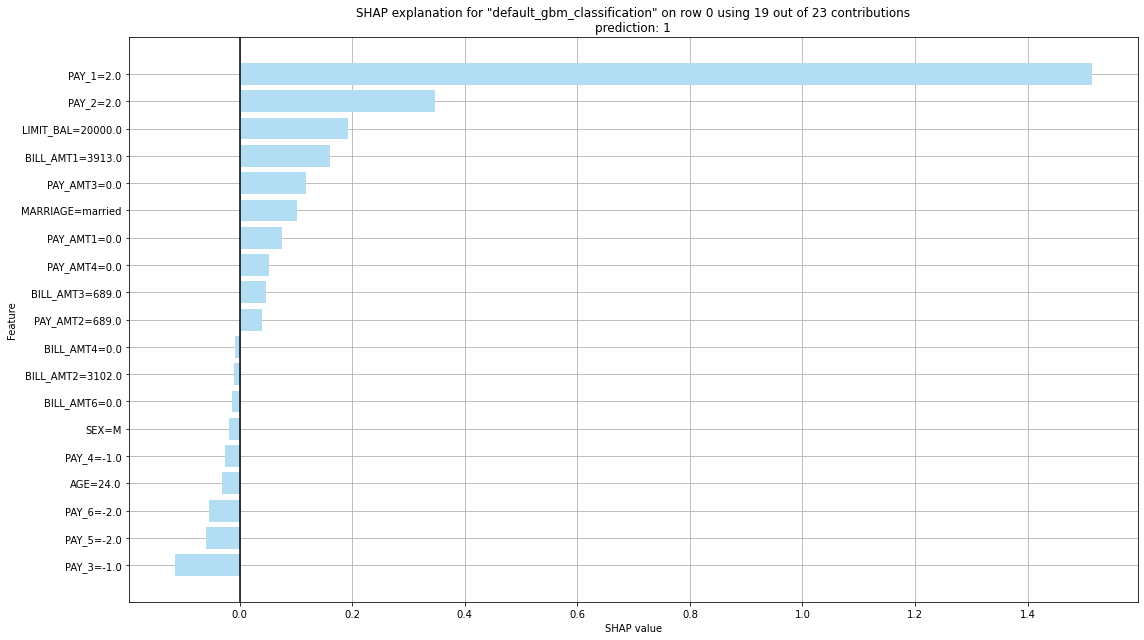

In [21]:
gbm_c.shap_explain_row_plot(frame_CreditCard, row_index=0)

上記プロットを実施したオブザベーションのSHAP値

In [23]:
gbm_c.predict_contributions(frame_CreditCard[0,:])

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BiasTerm
0.191833,-0.0190706,0.0210543,0.102442,-0.0317465,1.51385,0.346387,-0.115521,-0.0258978,-0.0598003,-0.0539594,0.161272,-0.00961654,0.0476057,-0.00802279,0.0372989,-0.0137648,0.0761711,0.0406582,0.117168,0.0529624,0.0212891,0.0312308,-1.50814


#### その他

[learning_curve_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.ModelBase.learning_curve_plot)

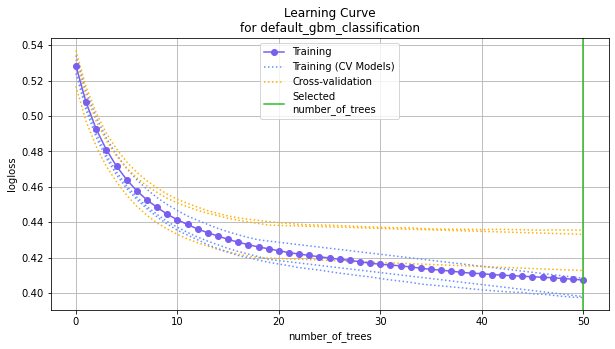

In [47]:
gbm_c.learning_curve_plot(figsize=(10, 5))

### 回帰

In [24]:
frame_Boston = h2o.import_file('https://h2oai-jpn-public.s3.amazonaws.com/sample-data/boston-house/BostonHousing.csv')
frame_Boston.shape

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


(506, 14)

In [25]:
frame_Boston.describe()

Rows:506
Cols:14




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
mean,3.613523557312253,11.363636363636365,11.136778656126484,0.0691699604743083,0.554695059288538,6.28463438735178,68.5749011857708,3.7950426877470367,9.549407114624506,408.23715415019757,18.455533596837927,356.6740316205534,12.653063241106722,22.532806324110666
maxs,88.9762,100.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,37.97,50.0
sigma,8.601545105332491,23.32245299451514,6.860352940897589,0.25399404134041037,0.11587767566755584,0.7026171434153232,28.148861406903595,2.1057101266276104,8.707259384239366,168.53711605495903,2.1649455237144455,91.29486438415782,7.141061511348571,9.197104087379815
zeros,0,372,0,471,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [26]:
y_col_boston = 'MEDV'
print('ターゲット変数： {}'.format(y_col_boston))
X_cols_boston = list( OrderedSet(frame_Boston.names) - OrderedSet(['ID',y_col_boston]) )    # ターゲット変数を除外
print('特徴量： {}'.format(X_cols_boston))

ターゲット変数： MEDV
特徴量： ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [27]:
# モデル(GMB)の学習
gbm_r= H2OGradientBoostingEstimator(seed=12345, model_id='default_gbm_regression', nfolds=3)
gbm_r.train(x=X_cols_boston, y=y_col_boston, training_frame=frame_Boston)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  default_gbm_regression


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,12399.0,5.0,5.0,5.0,9.0,22.0,15.16




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.942385756427842
RMSE: 1.7153383795705854
MAE: 1.2098845709925112
RMSLE: 0.08094556914010094
Mean Residual Deviance: 2.942385756427842

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 13.414306924021101
RMSE: 3.6625546991166016
MAE: 2.3776983701702057
RMSLE: 0.1565745988457253
Mean Residual Deviance: 13.414306924021101

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,mae,2.368825,0.261310,2.301468,2.657219,2.147788
1,mean_residual_deviance,13.279863,3.490445,11.805790,17.265520,10.768279
2,mse,13.279863,3.490445,11.805790,17.265520,10.768279
3,r2,0.836334,0.071592,0.876333,0.753681,0.878989
4,residual_deviance,13.279863,3.490445,11.805790,17.265520,10.768279
5,rmse,3.624214,0.466270,3.435955,4.155180,3.281506
6,rmsle,0.155336,0.017229,0.151045,0.174305,0.140657



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-07-22 11:46:31,0.395 sec,0.0,9.188012,6.647207,84.419557
1,,2022-07-22 11:46:31,0.401 sec,1.0,8.427062,6.106244,71.015377
2,,2022-07-22 11:46:31,0.406 sec,2.0,7.740335,5.614439,59.912792
3,,2022-07-22 11:46:31,0.412 sec,3.0,7.139061,5.184244,50.966193
4,,2022-07-22 11:46:31,0.417 sec,4.0,6.605002,4.788983,43.626047
5,,2022-07-22 11:46:31,0.422 sec,5.0,6.120656,4.436493,37.462434
6,,2022-07-22 11:46:31,0.427 sec,6.0,5.657774,4.094355,32.010411
7,,2022-07-22 11:46:31,0.431 sec,7.0,5.286167,3.811323,27.943563
8,,2022-07-22 11:46:31,0.436 sec,8.0,4.919711,3.549830,24.203553
9,,2022-07-22 11:46:31,0.440 sec,9.0,4.581403,3.304427,20.989256



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,RM,100003.750000,1.000000,0.460865
1,LSTAT,78115.437500,0.781125,0.359993
2,DIS,12379.580078,0.123791,0.057051
3,CRIM,6889.224121,0.068890,0.031749
4,NOX,6133.099121,0.061329,0.028264
5,PTRATIO,3916.082275,0.039159,0.018047
6,AGE,3882.314941,0.038822,0.017892
7,TAX,2325.987549,0.023259,0.010719
8,B,1521.888672,0.015218,0.007014
9,INDUS,880.175964,0.008801,0.004056


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

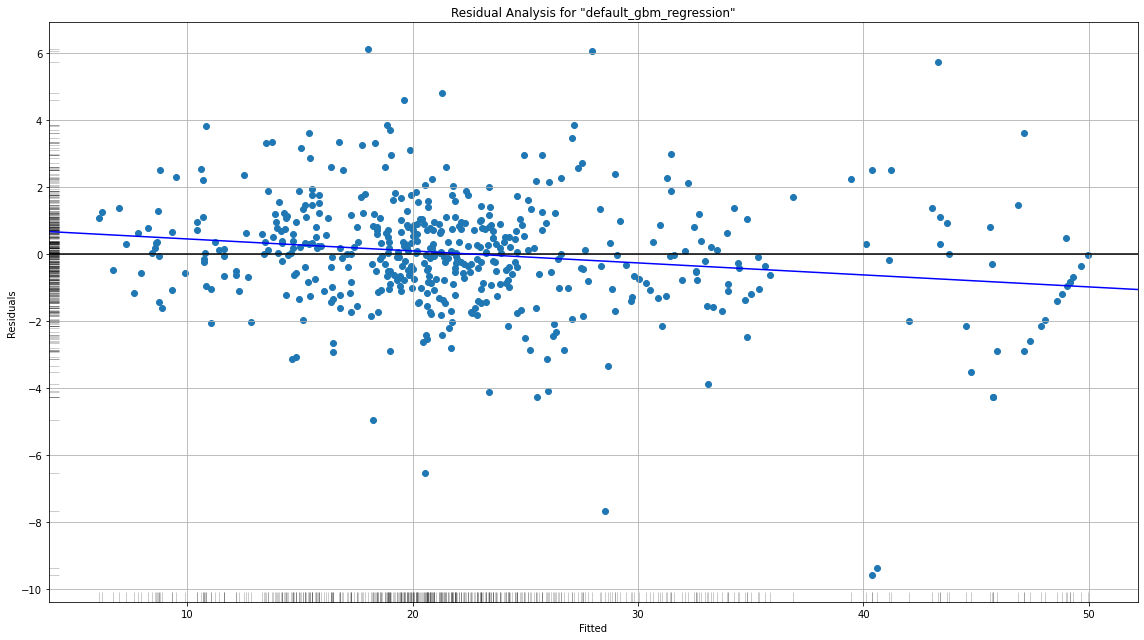

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

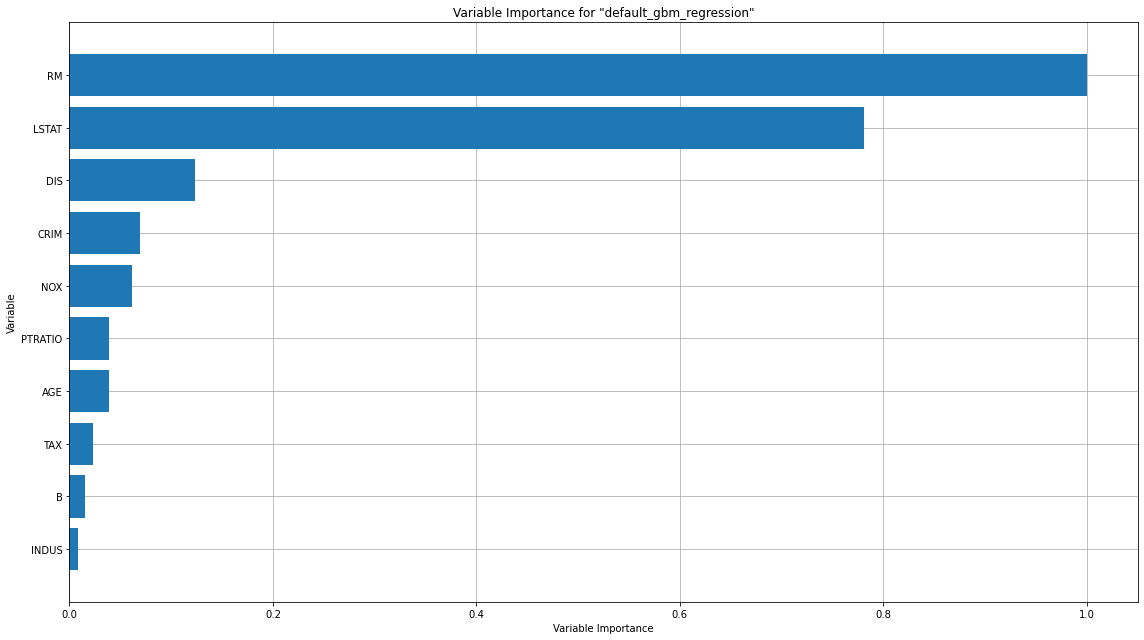

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

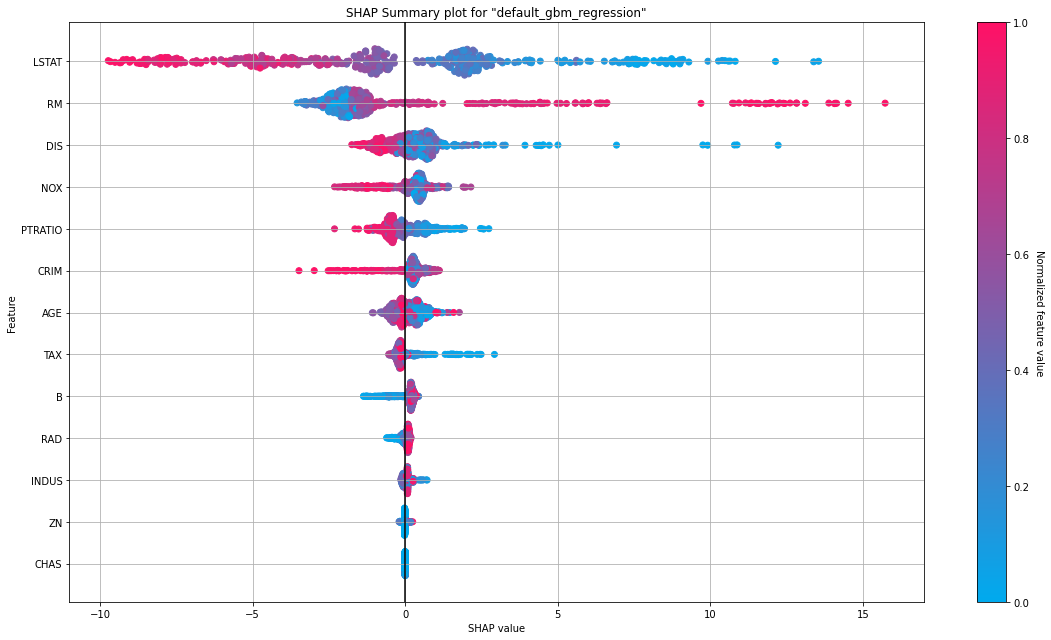

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

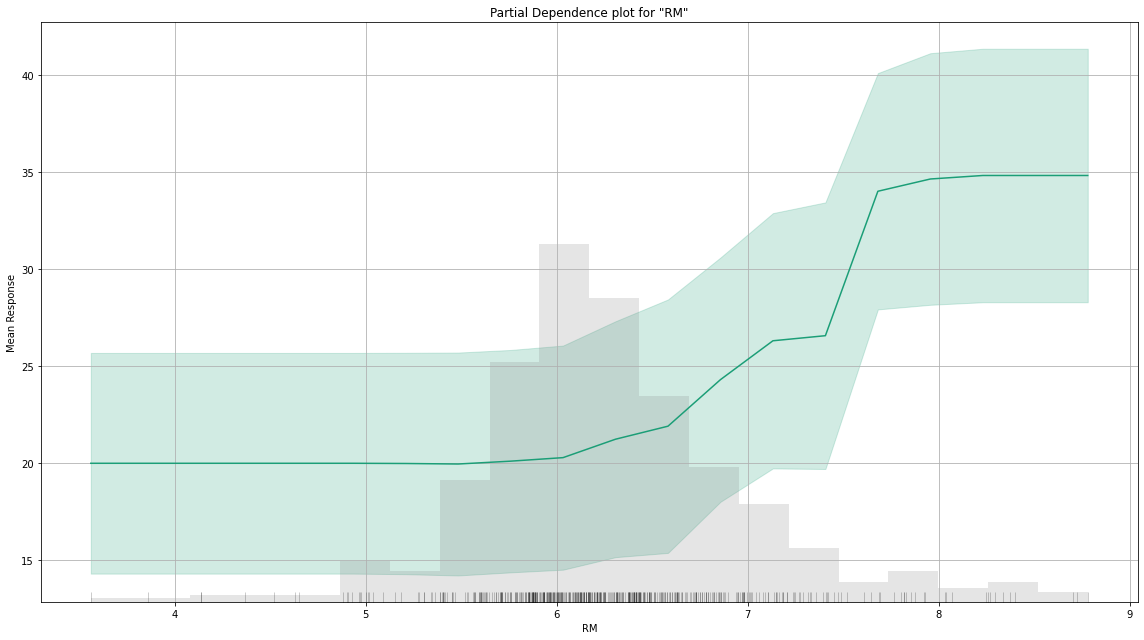

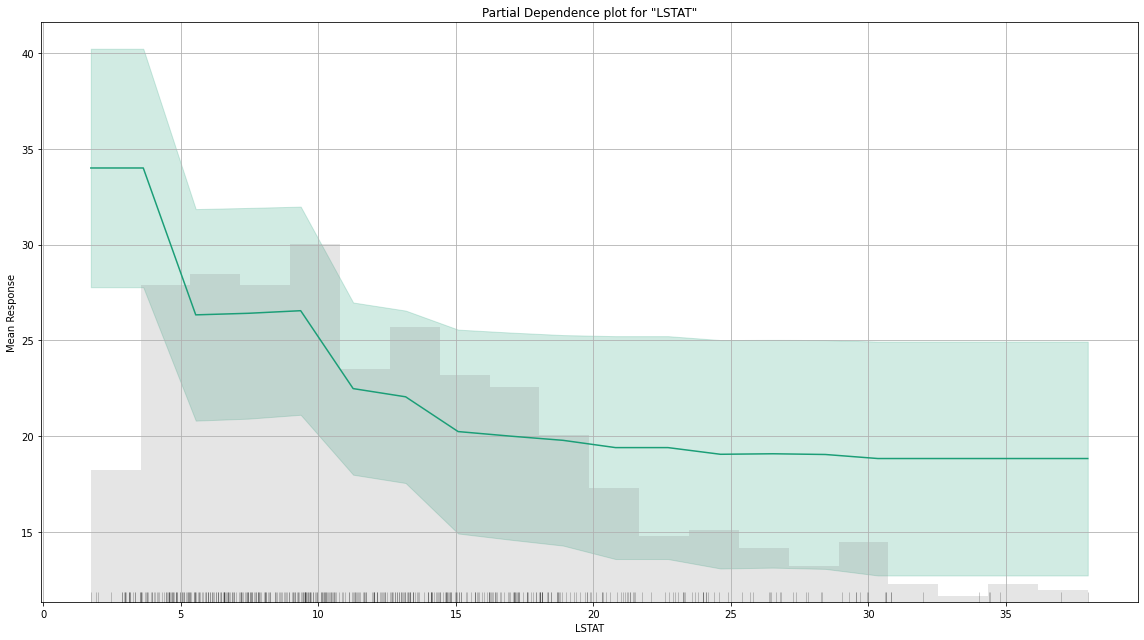

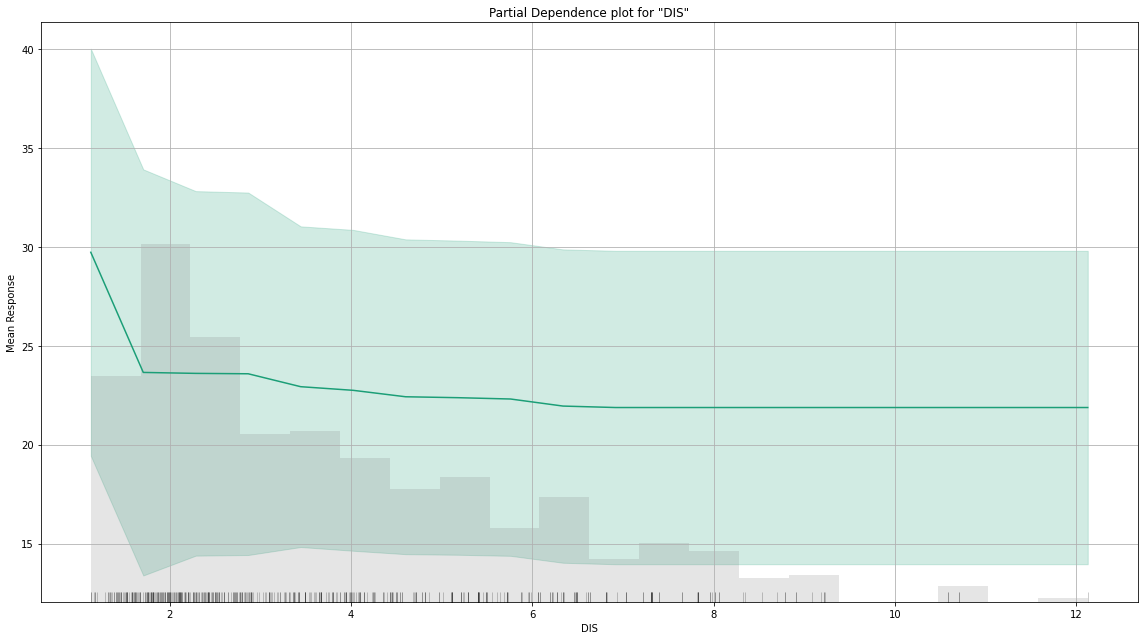

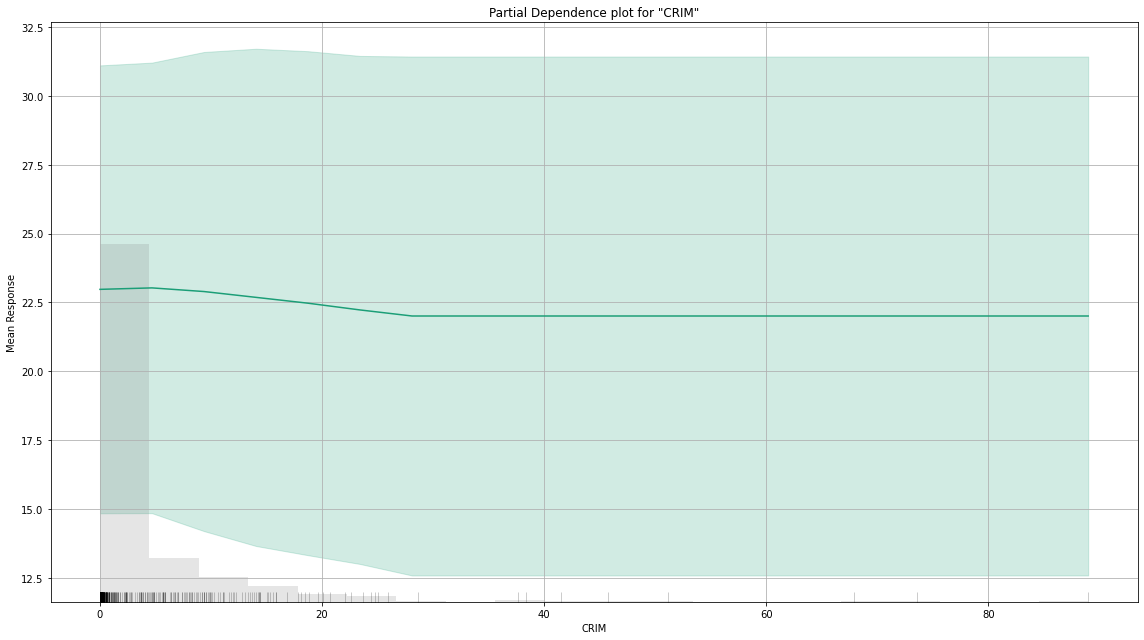

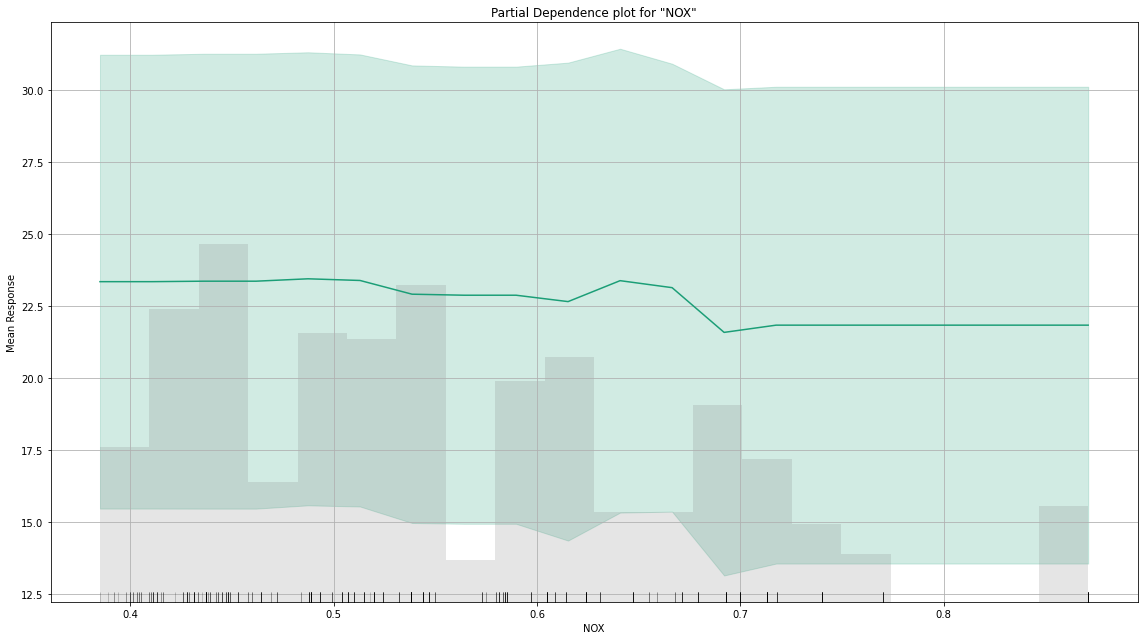

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

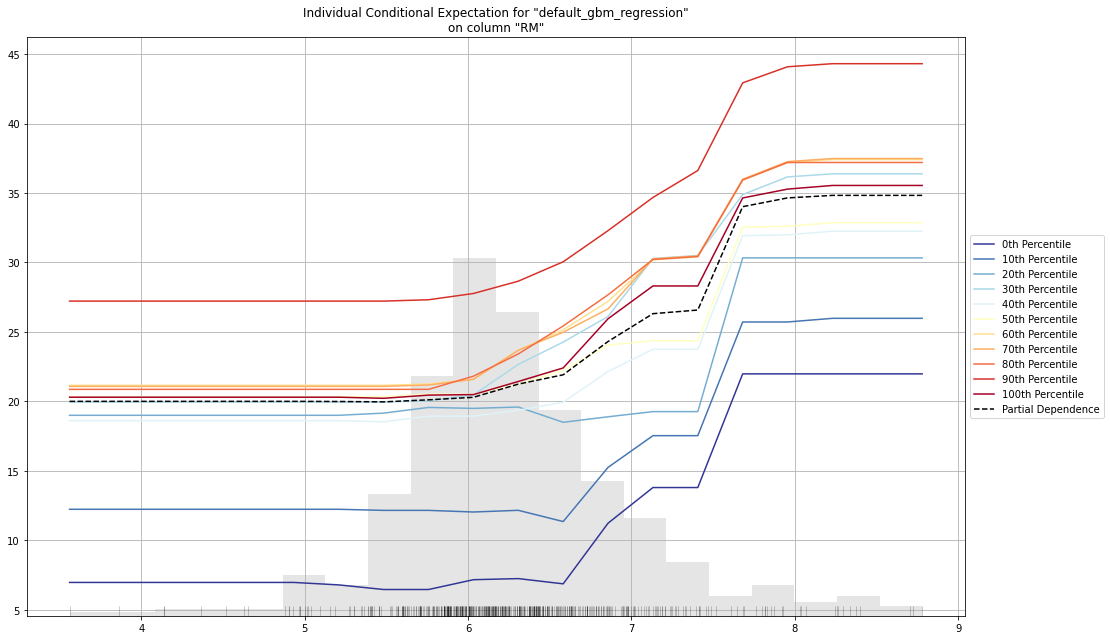

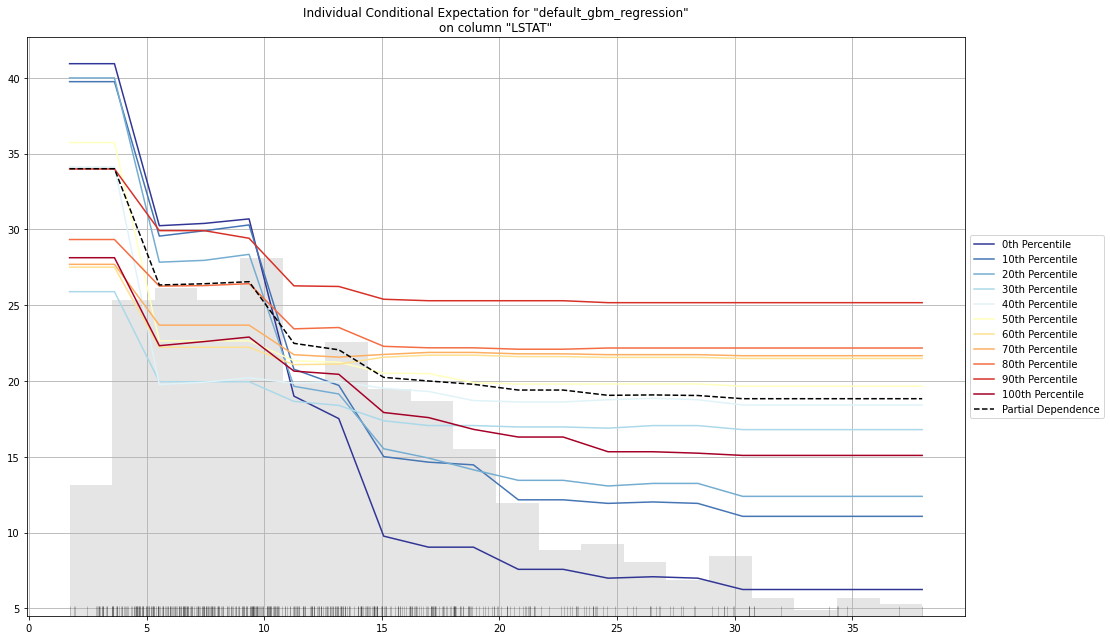

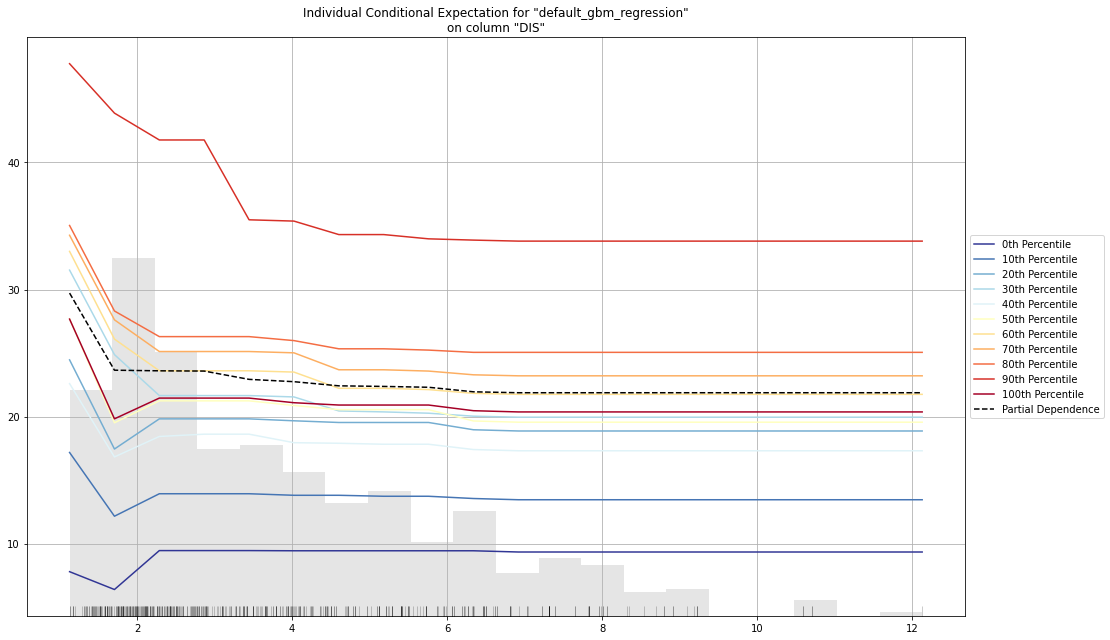

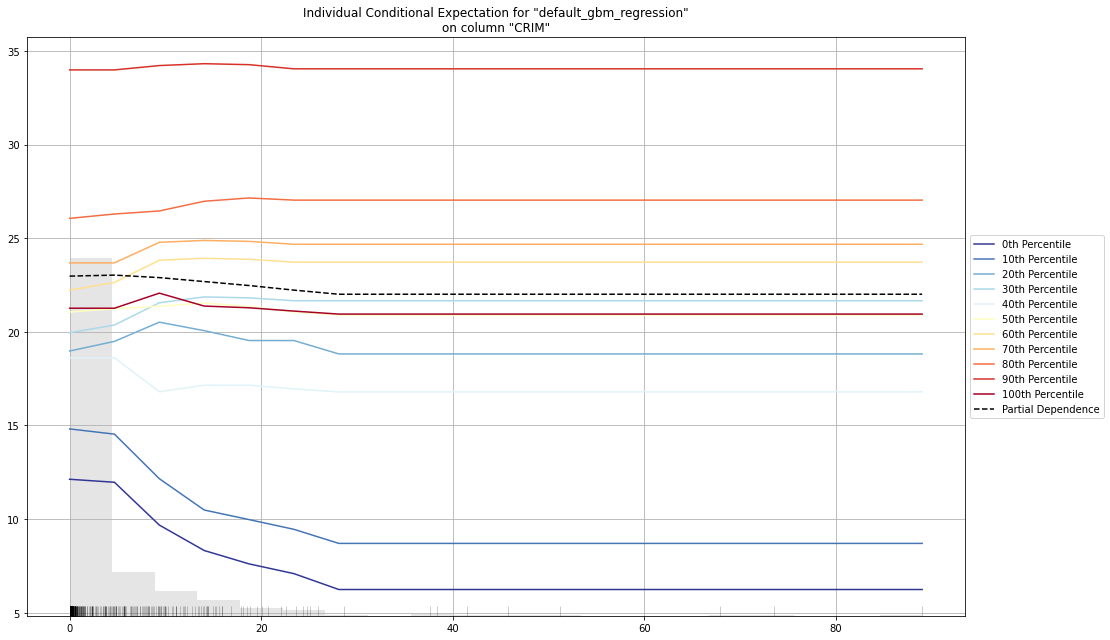

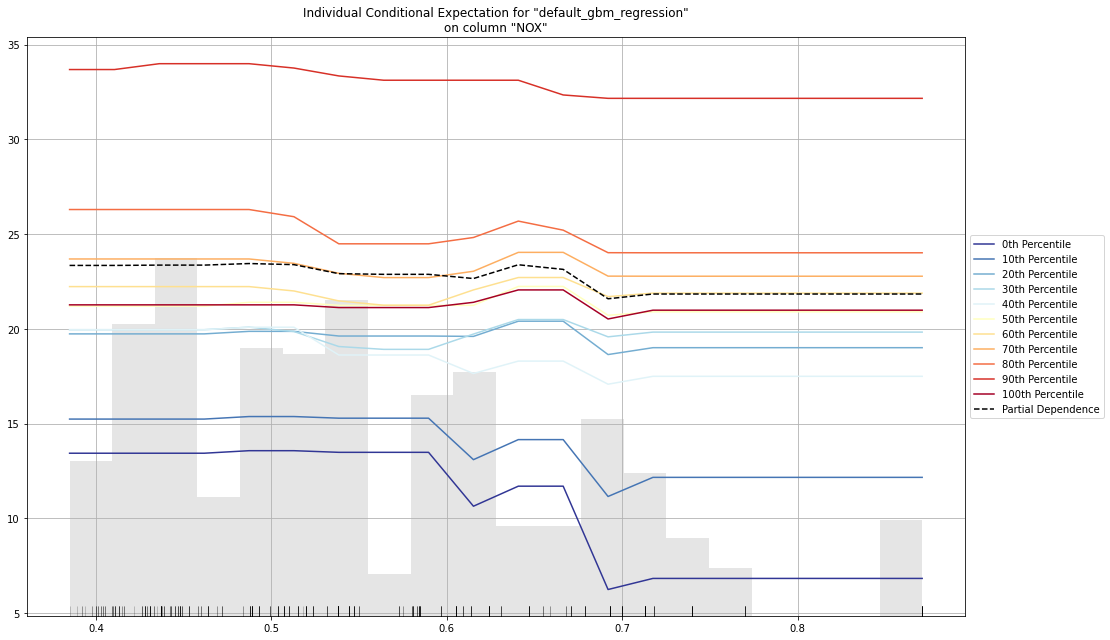

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [28]:
gbm_r.explain(frame_Boston)

##### Residual Analysis

[residual_analysis_plotメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#h2o.model.H2ORegressionModel.residual_analysis_plot)

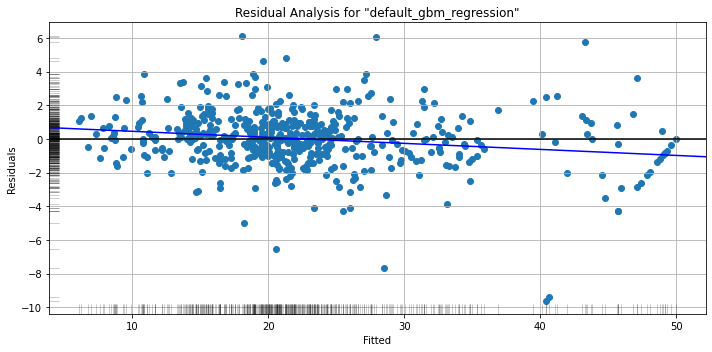

In [29]:
gbm_r.residual_analysis_plot(frame_Boston, figsize=(10, 5))

その他の解釈に関しては分類と同じ

## モデルの比較

AutoML等で複数のモデルを作成した際、モデルの比較を実施

In [30]:
aml = H2OAutoML(max_models=5, 
                max_runtime_secs_per_model=30, 
                nfolds=3,
                seed=42, 
                project_name='automl')
aml

In [31]:
aml.train(x=X_cols_creditc, y=y_col_creditc, training_frame=frame_CreditCard)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220722_114826

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.10486110502730807
RMSE: 0.3238226444016973
LogLoss: 0.3420885885268461
Null degrees of freedom: 10056
Residual degrees of freedom: 10051
Null deviance: 10624.642643423555
Residual deviance: 6880.769869628983
AIC: 6892.769869628983
AUC: 0.9040403831597414
AUCPR: 0.7553685433544287
Gini: 0.8080807663194829

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22507910032298478: 


,,0,1,Error,Rate
0,0,6589.0,1245.0,0.1589,(1245.0/7834.0)
1,1,452.0,1771.0,0.2033,(452.0/2223.0)
2,Total,7041.0,3016.0,0.1687,(1697.0/10057.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.225079,0.676083,243.0
1,max f2,0.179660,0.775532,273.0
2,max f0point5,0.552533,0.686045,110.0
3,max accuracy,0.348477,0.852640,182.0
4,max precision,0.989074,1.000000,0.0
5,max recall,0.068021,1.000000,362.0
6,max specificity,0.989074,1.000000,0.0
7,max absolute_mcc,0.205718,0.577598,256.0
8,max min_per_class_accuracy,0.212949,0.823334,251.0
9,max mean_per_class_accuracy,0.199113,0.828915,260.0



Gains/Lift Table: Avg response rate: 22.10 %, avg score: 22.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010043,0.839687,4.524067,4.524067,1.000000,0.869761,1.000000,0.869761,0.045434,0.045434,352.406658,352.406658,0.045434
1,2,0.020086,0.799563,4.524067,4.524067,1.000000,0.817356,1.000000,0.843558,0.045434,0.090868,352.406658,352.406658,0.090868
2,3,0.030029,0.771511,4.478826,4.509086,0.990000,0.785035,0.996689,0.824180,0.044534,0.135403,347.882591,350.908622,0.135275
3,4,0.040072,0.746016,4.255310,4.445485,0.940594,0.758977,0.982630,0.807839,0.042735,0.178138,325.531015,344.548478,0.177244
4,5,0.050015,0.720461,4.388345,4.434125,0.970000,0.733659,0.980119,0.793091,0.043635,0.221772,338.834458,343.412490,0.220496
5,6,0.100030,0.565317,3.237901,3.836013,0.715706,0.644236,0.847913,0.718664,0.161943,0.383716,223.790053,283.601271,0.364185
6,7,0.150045,0.424258,2.392449,3.354825,0.528827,0.491001,0.741551,0.642776,0.119658,0.503374,139.244873,235.482472,0.453591
7,8,0.200060,0.325876,2.167595,3.058017,0.479125,0.369778,0.675944,0.574527,0.108412,0.611786,116.759452,205.801717,0.528559
8,9,0.299990,0.223764,1.850141,2.655659,0.408955,0.268656,0.587007,0.472637,0.184885,0.796671,85.014066,165.565857,0.637621
9,10,0.400020,0.175372,1.038826,2.251350,0.229622,0.197432,0.497639,0.403819,0.103914,0.900585,3.882642,125.135006,0.642607




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1336452050003527
RMSE: 0.3655751701091756
LogLoss: 0.4267169507120605
Null degrees of freedom: 29999
Residual degrees of freedom: 29994
Null deviance: 31706.562735719508
Residual deviance: 25603.01704272363
AIC: 25615.01704272363
AUC: 0.78187142558388
AUCPR: 0.5629544068107861
Gini: 0.56374285116776

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2916508460364681: 


,,0,1,Error,Rate
0,0,20242.0,3122.0,0.1336,(3122.0/23364.0)
1,1,2970.0,3666.0,0.4476,(2970.0/6636.0)
2,Total,23212.0,6788.0,0.2031,(6092.0/30000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.291651,0.546186,207.0
1,max f2,0.130278,0.637281,312.0
2,max f0point5,0.444822,0.583234,146.0
3,max accuracy,0.477824,0.821667,135.0
4,max precision,0.996264,1.000000,0.0
5,max recall,0.016982,1.000000,399.0
6,max specificity,0.996264,1.000000,0.0
7,max absolute_mcc,0.363194,0.425629,177.0
8,max min_per_class_accuracy,0.184475,0.704802,271.0
9,max mean_per_class_accuracy,0.238622,0.715257,236.0



Gains/Lift Table: Avg response rate: 22.12 %, avg score: 22.12 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.806719,3.948162,3.948162,0.873333,0.842216,0.873333,0.842216,0.039482,0.039482,294.816154,294.816154,0.037855
1,2,0.02,0.773111,3.556359,3.752260,0.786667,0.788655,0.830000,0.815436,0.035564,0.075045,255.635925,275.226040,0.070680
2,3,0.03,0.745603,3.390597,3.631706,0.750000,0.759409,0.803333,0.796760,0.033906,0.108951,239.059675,263.170585,0.101375
3,4,0.04,0.722472,3.119349,3.503617,0.690000,0.733330,0.775000,0.780902,0.031193,0.140145,211.934901,250.361664,0.128588
4,5,0.05,0.697669,3.209765,3.444846,0.710000,0.709796,0.762000,0.766681,0.032098,0.172242,220.976492,244.484629,0.156962
5,6,0.10,0.566161,2.944545,3.194696,0.651333,0.635752,0.706667,0.701216,0.147227,0.319470,194.454491,219.469560,0.281805
6,7,0.15,0.418717,2.197107,2.862166,0.486000,0.488101,0.633111,0.630178,0.109855,0.429325,119.710669,186.216596,0.358661
7,8,0.20,0.326589,1.714888,2.575347,0.379333,0.369634,0.569667,0.565042,0.085744,0.515069,71.488849,157.534659,0.404557
8,9,0.30,0.226738,1.172393,2.107695,0.259333,0.269736,0.466222,0.466607,0.117239,0.632309,17.239301,110.769540,0.426693
9,10,0.40,0.178139,0.834840,1.789482,0.184667,0.200135,0.395833,0.399989,0.083484,0.715793,-16.515973,78.948162,0.405486


ベストモデルの説明き加え、モデルの比較分析が表示される

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20220722_114826,0.781871,0.426717,0.562954,0.290592,0.365575,0.133645,417,0.007326,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20220722_114826,0.781826,0.426745,0.563536,0.290258,0.36556,0.133634,3963,0.006508,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220722_114826,0.781732,0.426798,0.562384,0.291206,0.365617,0.133676,416,0.006065,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20220722_114826,0.781544,0.427226,0.559764,0.288487,0.365841,0.13384,511,0.003126,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20220722_114826,0.781421,0.427004,0.562541,0.291057,0.365701,0.133737,3949,0.005413,StackedEnsemble
GBM_1_AutoML_1_20220722_114826,0.781361,0.427471,0.558653,0.288081,0.366012,0.133965,688,0.001859,GBM
StackedEnsemble_AllModels_3_AutoML_1_20220722_114826,0.778735,0.429278,0.553419,0.288677,0.366884,0.134604,3480,0.006921,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20220722_114826,0.776713,0.430122,0.552978,0.291643,0.367183,0.134823,3341,0.006992,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220722_114826,0.770564,0.437128,0.542752,0.29652,0.36979,0.136745,6218,0.006534,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220722_114826,0.77023,0.438331,0.541425,0.295461,0.370258,0.137091,6568,0.00689,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20220722_114826


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22355443623280596: 


,,0,1,Error,Rate
0,0,19472.0,3892.0,0.1666,(3892.0/23364.0)
1,1,1348.0,5288.0,0.2031,(1348.0/6636.0)
2,Total,20820.0,9180.0,0.1747,(5240.0/30000.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

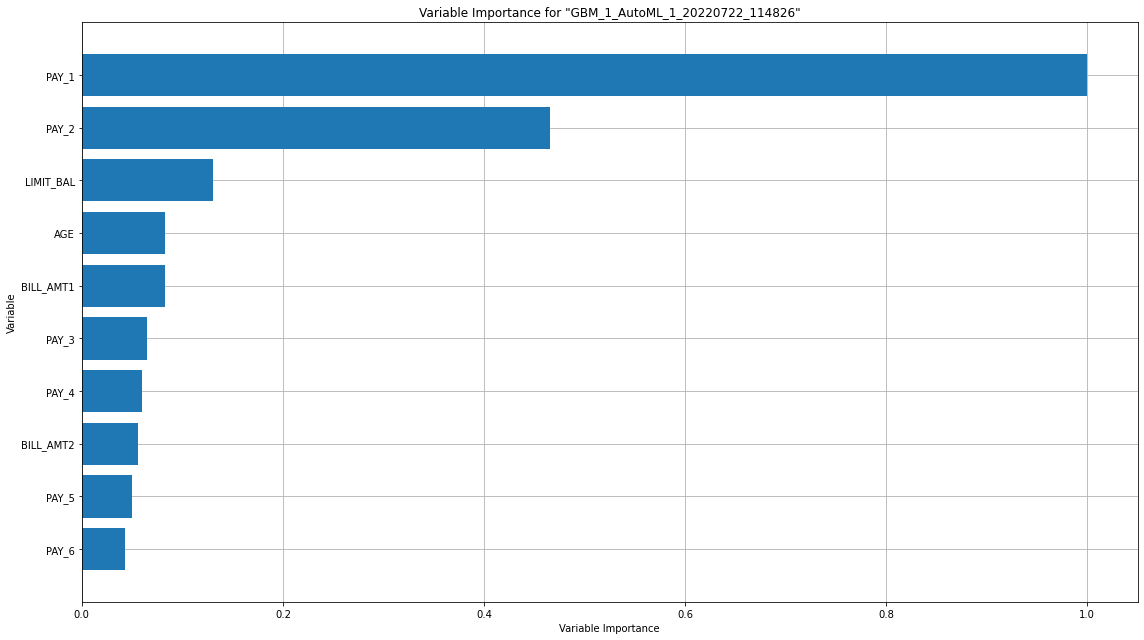

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

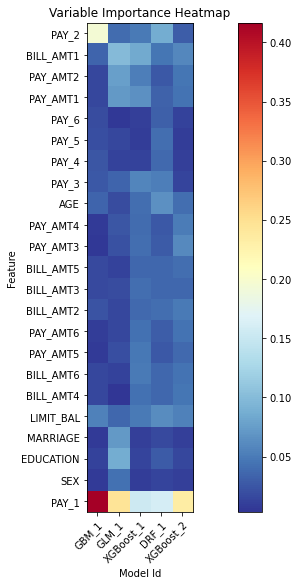

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

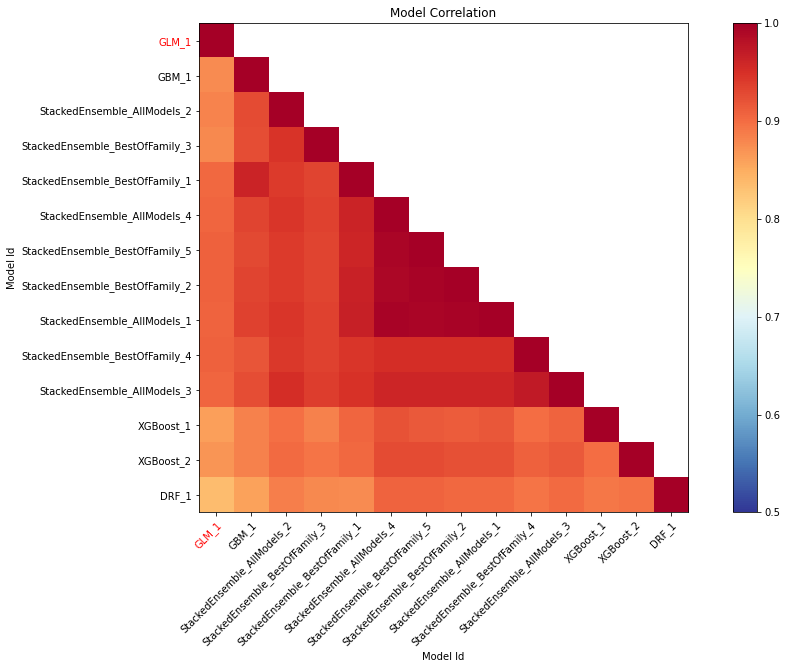

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

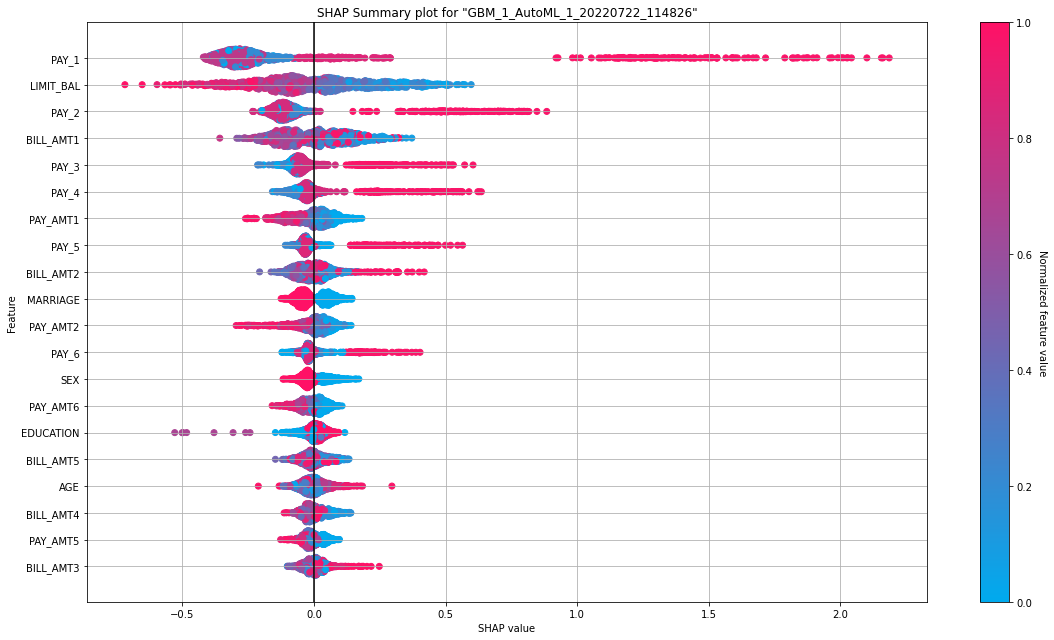

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

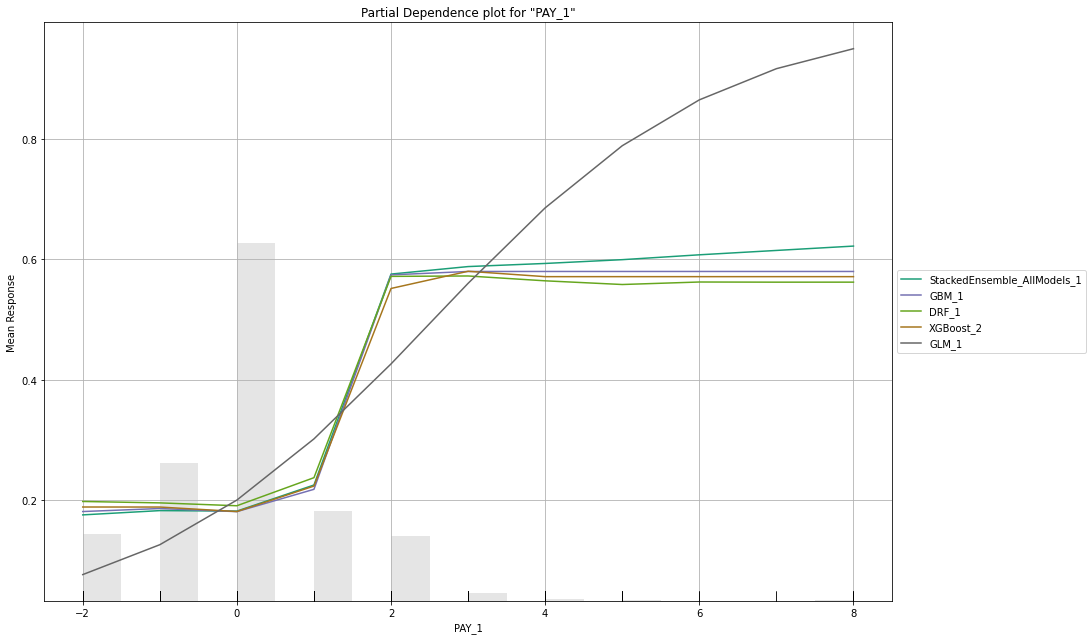

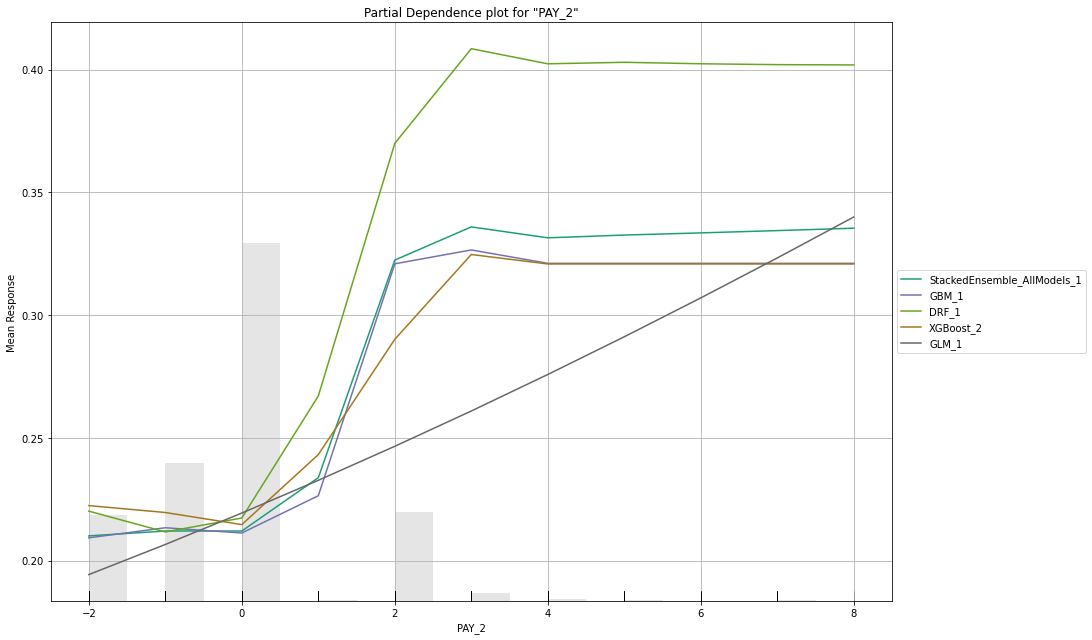

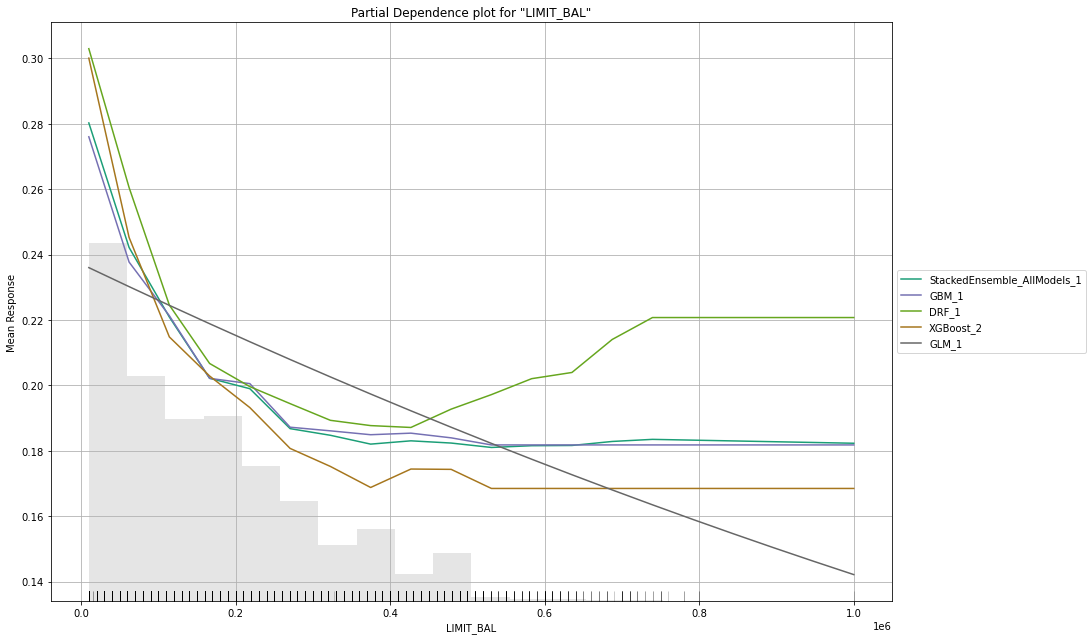

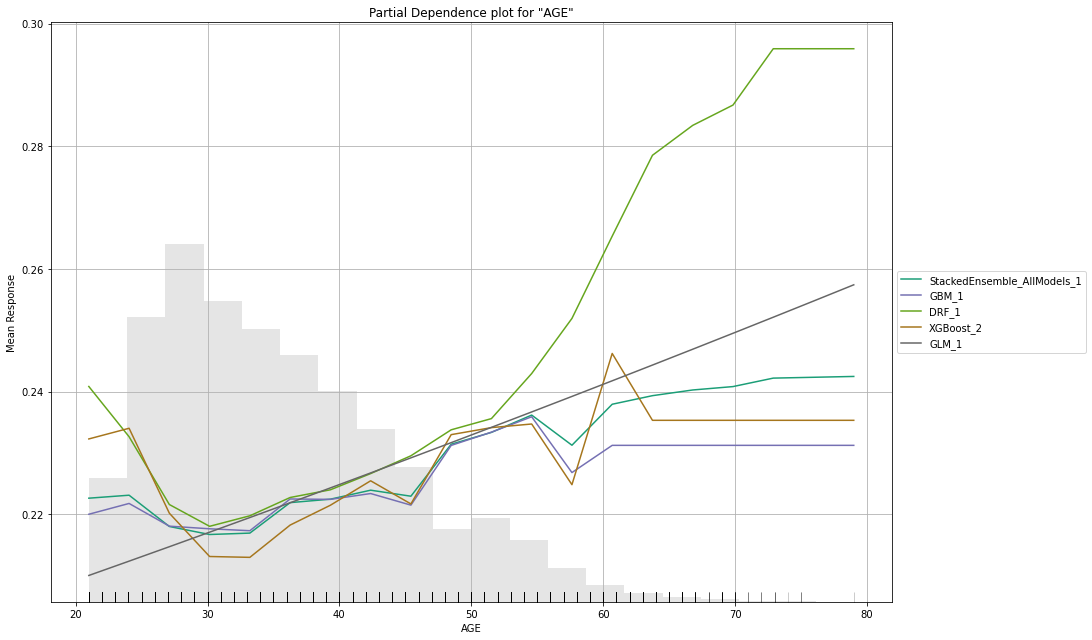

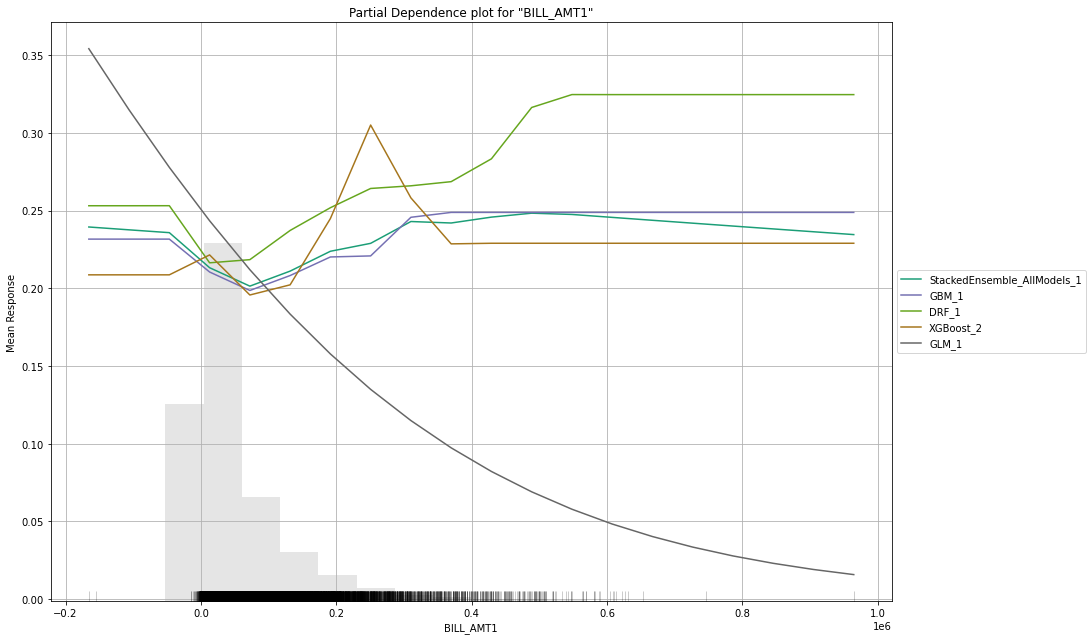

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20220722_114826,0.781871,0.426717,0.562954,0.290592,0.365575,0.133645,417,0.007326,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20220722_114826,0.781826,0.426745,0.563536,0.290258,0.36556,0.133634,3963,0.006508,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220722_114826,0.781732,0.426798,0.562384,0.291206,0.365617,0.133676,416,0.006065,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20220722_114826,0.781544,0.427226,0.559764,0.288487,0.365841,0.13384,511,0.003126,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20220722_114826,0.781421,0.427004,0.562541,0.291057,0.365701,0.133737,3949,0.005413,StackedEnsemble
GBM_1_AutoML_1_20220722_114826,0.781361,0.427471,0.558653,0.288081,0.366012,0.133965,688,0.001859,GBM
StackedEnsemble_AllModels_3_AutoML_1_20220722_114826,0.778735,0.429278,0.553419,0.288677,0.366884,0.134604,3480,0.006921,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20220722_114826,0.776713,0.430122,0.552978,0.291643,0.367183,0.134823,3341,0.006992,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220722_114826,0.770564,0.437128,0.542752,0.29652,0.36979,0.136745,6218,0.006534,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220722_114826,0.77023,0.438331,0.541425,0.295461,0.370258,0.137091,6568,0.00689,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20220722_114826


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22355443623280596: 


,,0,1,Error,Rate
0,0,19472.0,3892.0,0.1666,(3892.0/23364.0)
1,1,1348.0,5288.0,0.2031,(1348.0/6636.0)
2,Total,20820.0,9180.0,0.1747,(5240.0/30000.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [32]:
aml.explain(frame_CreditCard)

AutoMLで作成したモデルを精度順で表示

In [37]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20220722_114826,0.781871,0.426717,0.562954,0.290592,0.365575,0.133645
StackedEnsemble_AllModels_4_AutoML_1_20220722_114826,0.781826,0.426745,0.563536,0.290258,0.36556,0.133634
StackedEnsemble_BestOfFamily_2_AutoML_1_20220722_114826,0.781732,0.426798,0.562384,0.291206,0.365617,0.133676
StackedEnsemble_BestOfFamily_1_AutoML_1_20220722_114826,0.781544,0.427226,0.559764,0.288487,0.365841,0.13384
StackedEnsemble_BestOfFamily_5_AutoML_1_20220722_114826,0.781421,0.427004,0.562541,0.291057,0.365701,0.133737
GBM_1_AutoML_1_20220722_114826,0.781361,0.427471,0.558653,0.288081,0.366012,0.133965
StackedEnsemble_AllModels_3_AutoML_1_20220722_114826,0.778735,0.429278,0.553419,0.288677,0.366884,0.134604
StackedEnsemble_BestOfFamily_4_AutoML_1_20220722_114826,0.776713,0.430122,0.552978,0.291643,0.367183,0.134823
StackedEnsemble_BestOfFamily_3_AutoML_1_20220722_114826,0.770564,0.437128,0.542752,0.29652,0.36979,0.136745
StackedEnsemble_AllModels_2_AutoML_1_20220722_114826,0.77023,0.438331,0.541425,0.295461,0.370258,0.137091


[varimp_heatmapメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/h2o.html#h2o.varimp_heatmap)

予測精度上位のアンサンブル前の元モデルのVariable Importanceをヒートマップで表現

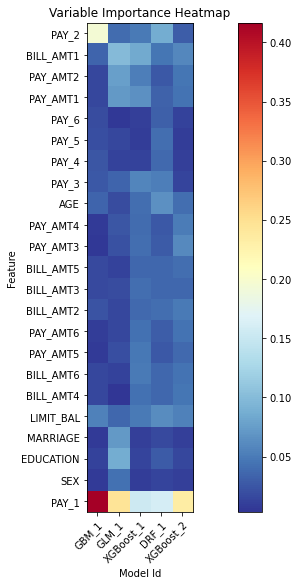

In [43]:
aml.varimp_heatmap()

[model_correlation_heatmapメソッド](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/h2o.html#h2o.model_correlation_heatmap)

各モデルの予測値の相関係数をヒートマップで表現。クラスタリングを利用して相関が高いものをまとめで表示

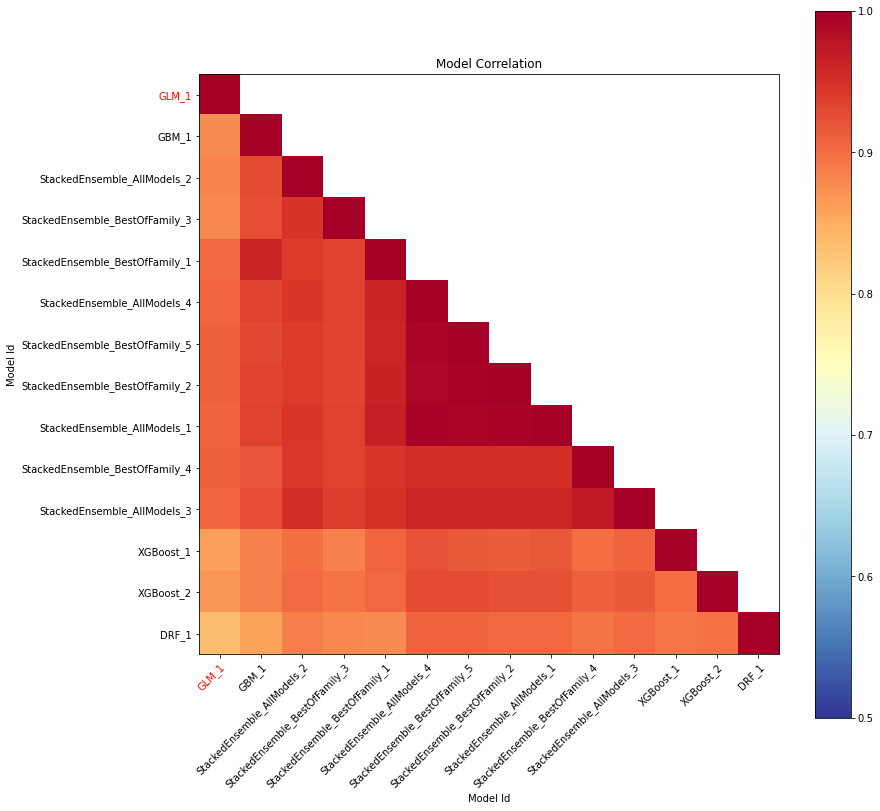

In [44]:
aml.model_correlation_heatmap(frame_CreditCard)

In [48]:
h2o.shutdown()

H2O session _sid_891f closed.


<ipython-input-48-1edf85295eae>:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
